## VISUALIZATION of intrahemisphere connectivity - HAGMANN

Similar to corpus callosum. Visualize relationships between extracted MRI variables and cognitive values.

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import glob
import statsmodels.api as sm
import statsmodels.formula.api as smf
from functools import reduce

In [73]:
# Load the csv
csv_hemis = f'MSP_hagmann.csv'
df_hemis = pd.read_csv(csv_hemis)
print(df_hemis.head())

   Unnamed: 0  Comm_ratio   L_avg_spl    R_avg_spl  inter_avg_spl  matrix_size
0           0    0.156859  367.588232   435.144085     454.158443         68.0
1           1    0.164037  389.156619  1009.442415     517.945900         68.0
2           2    0.180402  446.687636   696.453797     601.766728         68.0
3           3    0.156251  414.871476   514.657457     457.465054         68.0
4           4    0.159046  408.341035   580.519119     522.973460         68.0


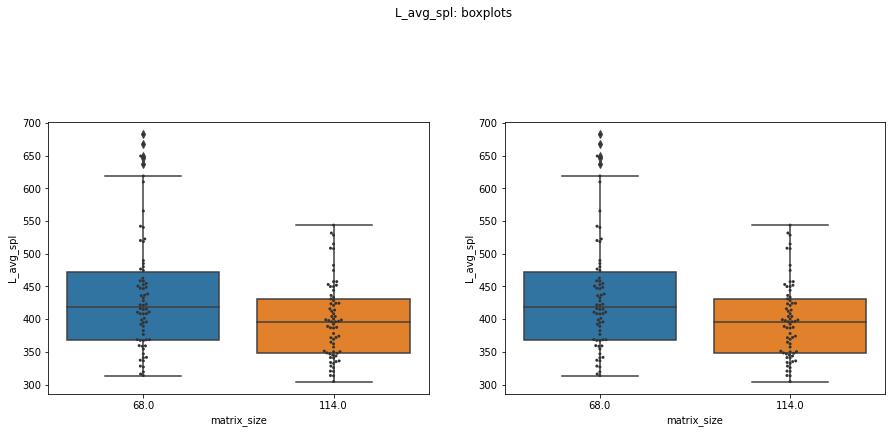

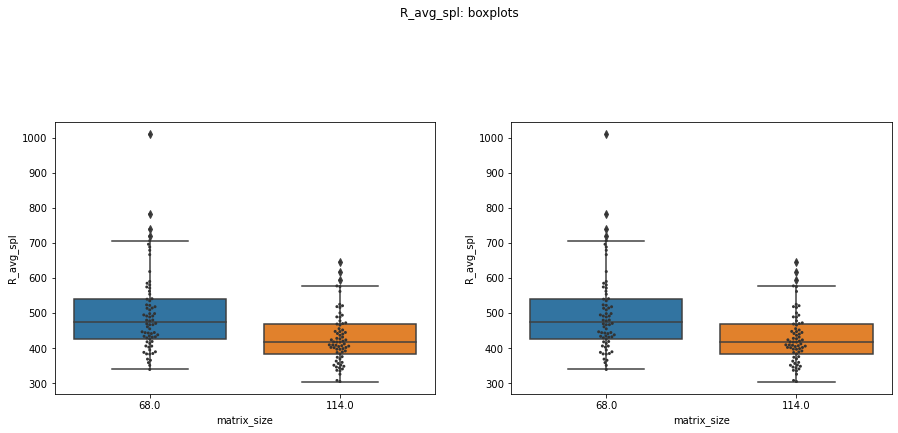

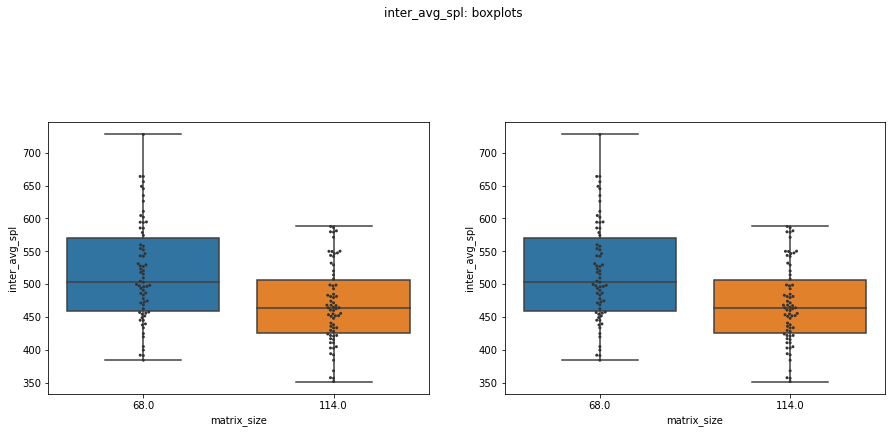

In [74]:
## Boxplots center and diagnosis
## Do for all the CC values
list_of_values = ["L_avg_spl", "R_avg_spl", "inter_avg_spl"]#, "FC_L_avg_spl", "FC_R_avg_spl", "FC_inter_avg_spl"]

for cc in list_of_values:

    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,5))
    plt.suptitle(f"{cc}: boxplots", y=1.2)
    sns.boxplot(data=df_hemis, x="matrix_size", y=f"{cc}", ax=ax1)
    sns.swarmplot(data=df_hemis, x="matrix_size", y=f"{cc}", ax=ax1, color=".2", size=3)

    sns.boxplot(data=df_hemis, x="matrix_size", y=f"{cc}", ax=ax2)
    sns.swarmplot(data=df_hemis, x="matrix_size", y=f"{cc}", ax=ax2, color=".2", size=3)

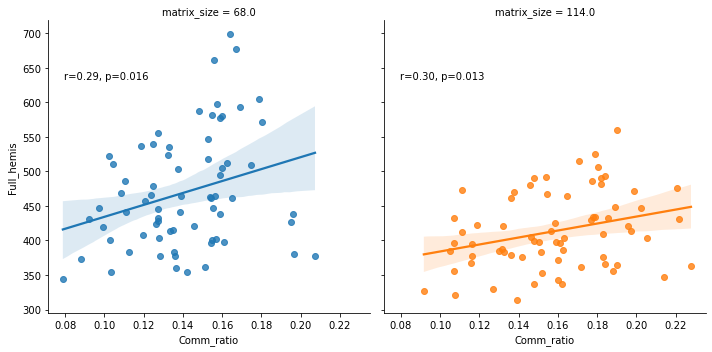

In [75]:
from scipy import stats

def annotate(data, **kws):
    r, p = stats.pearsonr(data[variable_to_plot], data[f"{cc}"])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

# Sum all values of CC and divide by ICV
# average intrahemis connectivity
# plot one against the other

df_hemis["Full_hemis"] = ( df_hemis["L_avg_spl"] + df_hemis["R_avg_spl"] ) / 2

variable_to_plot = "Comm_ratio"
cc = "Full_hemis"

g = sns.lmplot(data=df_hemis, x=variable_to_plot, y=f"{cc}", col="matrix_size", hue="matrix_size")
g.map_dataframe(annotate)
